In [1]:
import os
import numpy as np
import sys  
import io
sys_path="d:\\software\\python3\\lib\\site-packages"
sys.path.append(sys_path)
import re
import pandas as pd
import jieba
import nltk
import jieba.posseg as pseg
import codecs
from gensim import corpora, models, similarities
from nltk import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.decomposition import LatentDirichletAllocation  
import gensim
from nltk.stem.wordnet import WordNetLemmatizer  
import string  

In [2]:
stop_words_path="D:\\华为家庭存储\\文献分析\\停用词\\cn_stopwords.txt"
stopwords = codecs.open(stop_words_path,'r',encoding='utf8').readlines()
stopwords = [ w.strip() for w in stopwords ]
stop_flag = ['x', 'c', 'u','d', 'p', 't', 'uj', 'm', 'f', 'r']
#对一篇文章分词、去停用词


In [3]:
chang_path="D:/中南财经政法大学/课程资料 class info/python金融大数据/数据集"
os.chdir(chang_path)  

In [4]:
def tokenization(text,stop_flag,stopwords):
	result=[]
	words=pseg.cut(text)
	for word,flag in words:
		if flag not in stop_flag and word not in stopwords:
			result.append(word)
	return result

In [5]:
def find_keywords_abstract(keywords,df_abstract,stop_flag,stopwords): #或者条件，keyword
    df_with_key=df_abstract
    df_with_key["key"]=0
    df_with_key = df_with_key.reset_index(drop=True)  
    for i in range(len(df_with_key["Summary"])):
        temp=tokenization(df_with_key.loc[i,"Summary"],stop_flag,stopwords)
        for word in temp:
            if word in keywords:
                df_with_key.loc[i,"key"]=1
                break
    df_with_key = df_with_key[df_with_key['key'] ==1]  
    return df_with_key


In [6]:
df = pd.read_excel("中文前四期刊摘要.xlsx")
df["year"]=df['PubTime'].str[:4]
df["year"]=df["year"].astype(int)
df = df[df['year'] > 2015]  
df_reset = df.reset_index(drop=True)  
df.shape
df.head()

,Title,PubTime,Summary,Authors,Source,Organ,year
0,劳务派遣在中国的演进历程与动力机制,2023-11-17 15:11,本文以劳务派遣企业为切入点，使用全样本工商注册数据和2008-2016年税收调查数据，结合历...,鄢伟波,世界经济,中南财经政法大学财政税务学院;收入分配与现代财政学科创新引智基地;,2023
1,中间品市场、国内贸易成本与区域协调发展,2023-11-17 16:26,建设全国统一大市场是构建新发展格局的基础支撑和内在要求。本文建立多地区多行业且囊括行业间生产...,段玉婉; 方萱; 陈斌开; 吴利学,世界经济,中央财经大学国际经济与贸易学院;北京大学国家发展研究院;中央财经大学经济学院;中国社会科学院...,2023
2,绿色发展的中国模式：政府采购与企业绿色创新,2023-11-17 16:43,绿色创新是推动绿色发展、加速经济结构绿色转型的核心力量。本文利用2015-2020年上市公司...,黄继承; 朱光顺,世界经济,中国人民大学财政金融学院中国财政金融政策研究中心;对外经济贸易大学金融学院;,2023
3,工业用地价格与企业产能利用率,2023-11-17 16:44,化解产能过剩是推动新时代中国经济高质量发展的重要环节。本文基于地价管制政策带来的冲击，考察工...,刘若鸿; 许晏君,世界经济,福建师范大学经济学院;西安交通大学经济与金融学院;,2023
4,财政补贴与中低技能劳动者权益：就业模式转变视角,2023-11-17 17:08,本文从理论上分析了财政补贴对中低技能劳动者权益的影响机理，并利用中国家庭追踪调查数据进行计量...,邓红亮,世界经济,浙江工业大学经济学院;浙江工业大学现代化产业体系研究院;,2023


In [17]:
keywords=["创新","研发"]
#keywords=["绿色","碳","污染"]

In [18]:
df_with_key=find_keywords_abstract(keywords,df,stop_flag,stopwords)

In [19]:
df_with_key.head()

,Title,PubTime,Summary,Authors,Source,Organ,year,key
2,绿色发展的中国模式：政府采购与企业绿色创新,2023-11-17 16:43,绿色创新是推动绿色发展、加速经济结构绿色转型的核心力量。本文利用2015-2020年上市公司...,黄继承; 朱光顺,世界经济,中国人民大学财政金融学院中国财政金融政策研究中心;对外经济贸易大学金融学院;,2023,1
3,工业用地价格与企业产能利用率,2023-11-17 16:44,化解产能过剩是推动新时代中国经济高质量发展的重要环节。本文基于地价管制政策带来的冲击，考察工...,刘若鸿; 许晏君,世界经济,福建师范大学经济学院;西安交通大学经济与金融学院;,2023,1
8,知识产品交易、边界障碍与效率损失评估,2023-10-24 12:00,本文创建了一个新颖的城市间专利交易数据集，探讨知识产品交易中的边界障碍，并评估了潜在的效率损...,吴小康; 铁瑛,世界经济,南京理工大学经济管理学院;南京大学亚太发展研究中心;上海对外经贸大学国际经贸研究所;,2023,1
13,简政放权、企业家活动配置与企业产品范围,2023-10-23 11:50,企业内产品范围调整是资源优化配置的重要渠道。本文利用中国行政审批制度改革这一准实验，考察简政...,陈勇兵; 林雄立; 李辉,世界经济,厦门大学经济学院;合肥工业大学经济学院;,2023,1
26,政务服务信息化与基本公共服务水平,2023-08-18 10:34,信息技术作为提升国家治理体系和治理能力现代化的重要抓手，为政府基本公共服务能力的提升带来了新...,黄寿峰; 赵岩,世界经济,厦门大学经济学院;厦门大学宏观经济研究中心;,2023,1


In [20]:
# 按年份和期刊对value进行加总  
result = df_with_key.groupby([ 'Source','year'])['key'].sum().reset_index()  
temp = df.groupby(['Source','year']).size().reset_index(name='count')  
result = pd.merge(result, temp, on=['year', 'Source'], how='inner')  
result['percentage']=result['key']/result['count']
result

,Source,year,key,count,percentage
0,世界经济,2016,7,96,0.072917
1,世界经济,2017,8,96,0.083333
2,世界经济,2018,11,96,0.114583
3,世界经济,2019,17,96,0.177083
4,世界经济,2020,10,96,0.104167
5,世界经济,2021,8,105,0.076190
6,世界经济,2022,11,108,0.101852
7,世界经济,2023,17,108,0.157407
8,管理世界,2016,33,156,0.211538
9,管理世界,2017,23,152,0.151316


In [21]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题


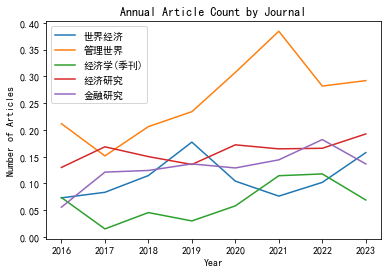

In [22]:

grouped_df=result

for journal in grouped_df['Source'].unique():  
    temp_df = grouped_df[grouped_df['Source'] == journal]  
    plt.plot(temp_df['year'], temp_df['percentage'], label=journal)  
  
plt.xlabel('Year')  
plt.ylabel('Number of Articles')  
plt.title('Annual Article Count by Journal')  
plt.legend()  
plt.show()